In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', None)
# pd.set_option("max_columns", None) # show all cols
# pd.set_option('max_colwidth', None) 
pd.reset_option('display.max_colwidth')

In [2]:
news = pd.read_pickle('apple_article_sentiments.pkl')

In [3]:
news.shape

(1079, 9)

In [4]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ticker        1079 non-null   object 
 1   publish_date  1079 non-null   object 
 2   title         1079 non-null   object 
 3   body_text     1079 non-null   object 
 4   url           1079 non-null   object 
 5   neg           1079 non-null   float64
 6   neu           1079 non-null   float64
 7   pos           1079 non-null   float64
 8   compound      1079 non-null   float64
dtypes: float64(4), object(5)
memory usage: 76.0+ KB


In [5]:
news['body_text'] = news['body_text'].astype(str) + '---newarticle---'


In [6]:
pd.set_option("display.max_colwidth", 100)

In [7]:
body_text = news['body_text']

In [8]:
with open('apple_body_text.txt', 'w') as f:
    f.write(
        body_text.to_string(header = False, index = False)
    )

In [9]:
with open('apple_body_text.txt', 'r') as f:
    lines = f.readlines()

# remove spaces
lines = [line.replace(' ', '') for line in lines]

# finally, write lines in the file
with open('apple_body_text.txt', 'w') as f:
    f.writelines(lines)

In [10]:
# first get all lines from file
a_file = open("apple_body_text.txt", "r")

# create variable for string without line breaks
string_without_line_breaks = ""

# iterate over strings 
for line in a_file:
  stripped_line = line.rstrip() # rstrip() method removes any trailing characters - space is the default trailing character to remove
  string_without_line_breaks += stripped_line
a_file.close()

In [11]:

# finally, write lines in the file
with open('apple_body_text.txt', 'w') as f:
    f.writelines(string_without_line_breaks)

In [12]:
dup = news.duplicated(subset='title')

In [13]:
dup = pd.DataFrame(dup,columns=['check'])

In [14]:
news.shape

(1079, 9)

In [15]:
news.drop_duplicates(subset='title',keep = 'first',inplace=True)
news.shape

(728, 9)

In [16]:
news['Date'] = pd.to_datetime(news['publish_date'])
news.set_index('Date',inplace = True)
news.head()

,ticker,publish_date,title,body_text,url,neg,neu,pos,compound
Date,,,,,,,,,
2024-04-12,AAPL,2024-04-12,"Morning Bid: Eyes switch to earnings, China trade miss, tense Middle East By Reuters",A look at the day ahead in U.S. and global markets from Mike Dolan\n\nWith markets now re-shuffl...,https://www.investing.com/news/commodities-news/morning-bid-eyes-switch-to-earnings-china-trade-...,0.070,0.847,0.083,0.9439
2024-04-11,AAPL,2024-04-11,US quarterly earnings to feature big growth in tech-related companies By Reuters,By Caroline Valetkevitch\n\nNEW YORK (Reuters) - Big technology-related company earnings are exp...,https://www.investing.com/news/economy/us-quarterly-earnings-to-feature-big-growth-in-techrelate...,0.029,0.840,0.131,0.9937
2024-04-13,AAPL,2024-04-13,Apple denies violating US court order in Epic Games lawsuit By Reuters,By Mike Scarcella\n\n(Reuters) - IPhone maker Apple on Friday denied violating a court order gov...,https://www.investing.com/news/stock-market-news/apple-denies-violating-us-court-order-in-epic-g...,0.084,0.856,0.059,0.1779
2024-04-12,AAPL,2024-04-12,Apple earnings preview: Goldman says but the pullback on any weakness in stock By Investing.com,"Apple's stock surged Thursday, fueled by a Bloomberg report claiming the tech giant plans a comp...",https://www.investing.com/news/stock-market-news/apple-earnings-preview-goldman-says-but-the-pul...,0.039,0.852,0.109,0.9865
2024-04-12,AAPL,2024-04-12,Apple loses bid to throw out UK lawsuit over App Store fees By Reuters,By Sam Tobin and Martin Coulter\n\nLONDON (Reuters) -Apple's bid to dismiss a lawsuit valued at ...,https://www.investing.com/news/stock-market-news/apple-loses-bid-to-throw-out-uk-lawsuit-over-ap...,0.090,0.877,0.033,-0.9418


In [17]:
news.sort_index(inplace=True)

In [18]:
news_cut = news.copy()

In [19]:
news_cut.drop(['body_text','url','ticker'],axis =1,inplace = True)

In [20]:
news_cut['mean_compound'] = news_cut.groupby(by='publish_date')['compound'].transform(lambda x: x.mean())

In [21]:
news_cut['title'] = news_cut.groupby(by = 'publish_date')['title'].transform(lambda x: " ".join(x))

In [22]:
news_cut.drop_duplicates(subset='publish_date',inplace=True)

In [23]:
news_cut.drop('compound',axis = 1,inplace = True)


In [24]:
news_cut['label'] = news_cut['mean_compound'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))


In [25]:
import seaborn as sns

<Axes: xlabel='label', ylabel='count'>

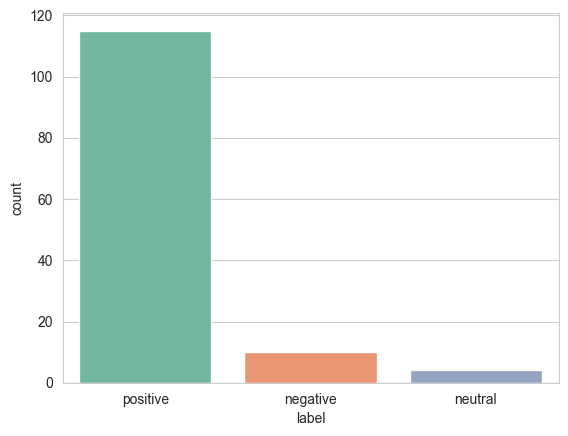

In [236]:
sns.barplot(news_cut['label'].value_counts(),palette="Set2")

In [237]:
train = pd.read_csv('AAPL_train.csv')
test = pd.read_csv('AAPL_test.csv')

In [238]:
merged = pd.concat([train,test], axis = 0, ignore_index = True)

In [239]:
merged['Dated']= pd.to_datetime(merged['Date'])

In [240]:
merged.set_index('Dated',inplace = True)

In [241]:
merged['Date'] = pd.to_datetime(merged['Date'])

In [242]:
for_news = merged[merged['Date'] >= pd.to_datetime('2023-11-13')]

In [243]:
for_news = for_news[['Date','Adj Close']]

In [244]:
combined = pd.concat([for_news,news_cut],axis =1)

In [245]:
combined.isnull().sum()

Date             27
Adj Close        27
publish_date      1
title             1
neg               1
neu               1
pos               1
mean_compound     1
label             1
dtype: int64

In [246]:
off_days = combined[combined['Date'].isnull()]


#### 1st approach: drop cmn hết đi nghĩ nhiều làm gì

In [247]:
app1 = combined.dropna()

In [248]:
app1.drop(['Date','title'],axis = 1, inplace = True)

In [249]:
app1

,Adj Close,publish_date,neg,neu,pos,mean_compound,label
2023-11-13,184.564499,2023-11-13,0.048,0.880,0.072,0.871167,positive
2023-11-14,187.201126,2023-11-14,0.042,0.887,0.071,0.577170,positive
2023-11-15,187.770386,2023-11-15,0.015,0.912,0.073,0.569244,positive
2023-11-16,189.468246,2023-11-16,0.031,0.841,0.128,0.977345,positive
2023-11-17,189.448257,2023-11-17,0.041,0.873,0.086,0.820054,positive
...,...,...,...,...,...,...,...
2024-04-08,168.449997,2024-04-08,0.003,0.853,0.144,0.882850,positive
2024-04-09,169.669998,2024-04-09,0.017,0.832,0.151,0.760580,positive
2024-04-10,167.779999,2024-04-10,0.014,0.942,0.044,0.292533,positive
2024-04-11,175.039993,2024-04-11,0.058,0.875,0.067,0.564200,positive


In [271]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

class ML_shift:
    def __init__(self, data, train_size=80, col='Adj Close'):
        self.data = data
        self.train_size = train_size
        self.col = col
        #self.n_days = 0
        #self.X_train, self.y_train, self.X_test, self.y_test = self.train_test(n_days)
        
    def shift_back(self, n_days, col):
        temp = self.filter()
        for i in range(1, n_days+1):
            temp[f'P(t-{i})'] = temp[col].shift(i)
        return temp
    
    def filter(self):
        filter = self.data.copy()
        if 'Date' in filter.columns:
            filter['Date'] = pd.to_datetime(filter['Date'])
            filter = filter.set_index('Date')[[self.col]]
        return filter

    def train_test(self,n_days):
        shifted = self.shift_back(n_days = n_days, col =self.col)
        train = shifted[:self.train_size].dropna()
        test = shifted[self.train_size:]
        X_train = train.drop(self.col, axis=1)
        y_train = train[self.col].values
        X_test = test.drop(self.col, axis=1)
        y_test = test[self.col].values
        return X_train, y_train, X_test, y_test
    
    def model_fit(self):
        model = LinearRegression()
        model.fit(self.X_train, self.y_train)
        pred = model.predict(self.X_test)
        rmse = mean_squared_error(self.y_test, pred, squared=False)
        r2 = r2_score(self.y_test, pred)
        return pred, rmse, r2
    
    def plot(self):
        pred, _, _ = self.model_fit()
        sns.set_palette("Set2")
        plt.figure(figsize=(10, 5))
        plt.plot(self.y_test, label="Actual")
        plt.plot(pred, label="Predicted")
        plt.legend()
        plt.show()
    
    def fit(self, plot=True,n_days = 3,get_pred_only = False):
        #self.n_days = n_days
        self.X_train, self.y_train, self.X_test, self.y_test = self.train_test(n_days)
        pred, rmse, r2 = self.model_fit()
        if get_pred_only:
            return pred
        result = pd.DataFrame(columns = ['Days shifted','RMSE', 'R^2'])
        result_len = len(result)
        result.loc[result_len] = n_days,rmse,r2
        #print(f'RMSE: {rmse}, R^2 : {r2}')
        if plot:
            self.plot()
        return result

In [272]:
app1_ko_news = app1[['Adj Close']]

In [275]:
ko_news = ML_shift(app1_ko_news)

In [276]:
pred_0= ko_news.fit(get_pred_only = True)

In [278]:
pred_0

array([174.14467744, 171.35340563, 173.71598537, 173.34663931,
       174.44603   , 177.17428184, 179.85696659, 170.65882224,
       172.14212744, 171.29560328, 169.97553318, 174.53184135,
       172.14929961, 170.15796227, 169.13239152, 170.39690559,
       169.48602059, 170.3649218 , 169.05810424, 170.51781487,
       168.30413329, 176.92465627])

In [280]:
#app1.drop('publish_date',axis = 1,inplace = True)

In [47]:
#app1_no_label = app1.drop('label', axis = 1)

In [281]:
app1

,Adj Close,neg,neu,pos,mean_compound,label
2023-11-13,184.564499,0.048,0.880,0.072,0.871167,2.0
2023-11-14,187.201126,0.042,0.887,0.071,0.577170,2.0
2023-11-15,187.770386,0.015,0.912,0.073,0.569244,2.0
2023-11-16,189.468246,0.031,0.841,0.128,0.977345,2.0
2023-11-17,189.448257,0.041,0.873,0.086,0.820054,2.0
...,...,...,...,...,...,...
2024-04-08,168.449997,0.003,0.853,0.144,0.882850,2.0
2024-04-09,169.669998,0.017,0.832,0.151,0.760580,2.0
2024-04-10,167.779999,0.014,0.942,0.044,0.292533,2.0
2024-04-11,175.039993,0.058,0.875,0.067,0.564200,2.0


c:\Users\KyThuat88\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\KyThuat88\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


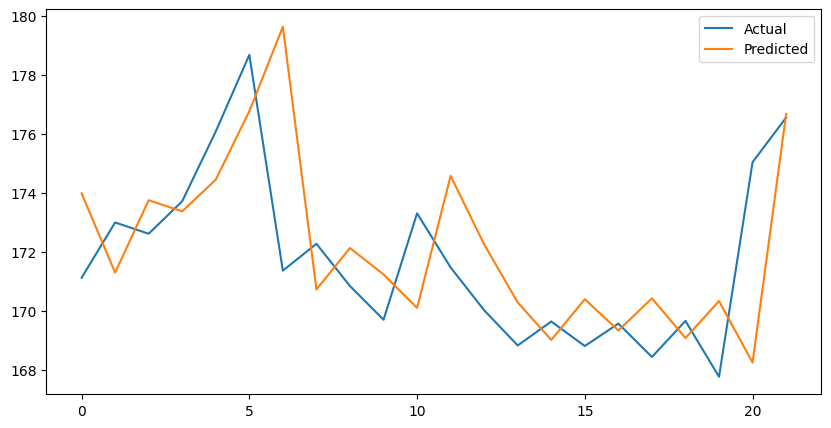

,Days shifted,RMSE,R^2
0,3.0,2.859251,-0.0272


In [53]:
check2 = ML_shift(app1.drop(['neu','neg','pos','label'],axis = 1))
check2.fit()

In [264]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
app1['label'] = enc.fit_transform(app1['label'].values.reshape(-1,1))

In [282]:
check3 = ML_shift(app1.drop(['neu','neg','pos'], axis =1))
pred_news = check3.fit(plot = False, get_pred_only = True)

In [284]:
compare = app1[['Adj Close']][80:]
compare['news'] = pred_news
compare['no_news'] = pred_0

<Axes: >

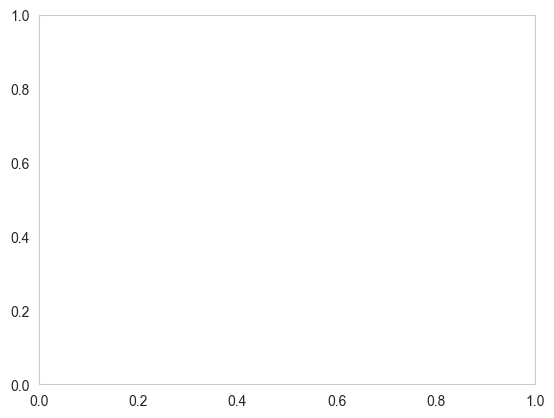

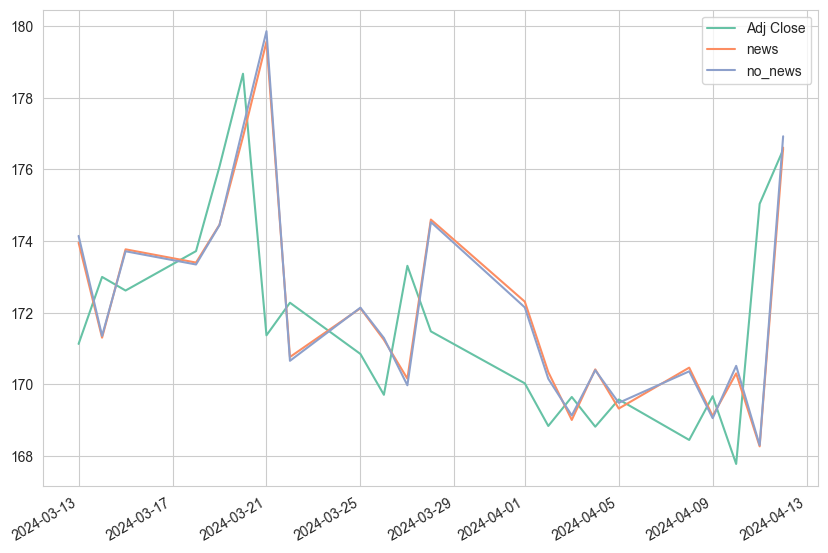

In [293]:
#plt.figure(figsize=(15,7))
#plt.grid(b=None)
plt.grid(False)
compare.plot(figsize=(10,7))
# #sns.set_palette("Set2")
# plt.figure(figsize=(10, 5))
# plt.plot(self.y_test, label="Actual")
# plt.plot(pred, label="Predicted")
# plt.legend()
# plt.show()

### Comment on approach 1: kết hợp với news có cải thiện (không nhiều) -- chỉ cần tập trung vào compound score và nên có thêm label sentiment

### TRY ARIMA EXOG

In [61]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [62]:
app1_arima = app1[['Adj Close']]
app1_exog = app1[['mean_compound','label']]

In [63]:
from pmdarima.arima import auto_arima
auto = auto_arima(app1_arima,start_p=1,start_q=1,test='adf',max_p = 5, max_q = 5,d = 1,
                  m=1,seasonal=False,stationary = False,trace = True,error_action='ignore',
                  suppress_warnings=True,stepwise=True)
print(auto.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=451.021, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=447.668, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=449.222, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=449.286, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=445.802, Time=0.00 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.328 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  102
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -221.901
Date:                Thu, 02 May 2024   AIC                            445.802
Time:                        22:05:25   BIC                            448.417
Sample:                             0   HQIC                           446.861
                                - 102                                         
Co

Test RMSE: 2.776


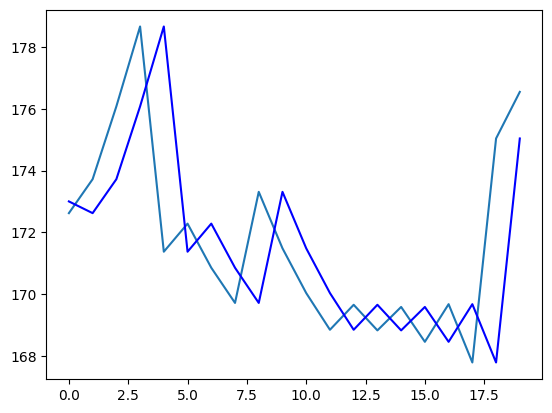

In [64]:
from sklearn.metrics import mean_squared_error

train_val = app1_arima[:82].values
#train_size = len(train_set)
#train, test = x[0:train_size], x[train_size:]
test_val = app1_arima[82:].values
history = [x for x in train_val]
predictions = []
for t in range(len(test_val)):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_val[t]
    history.append(obs)
    #print('predicted=%f, actual=%f' % (yhat, obs))
error = mean_squared_error(test_val, predictions)
print('Test RMSE: %.3f' % np.sqrt(error))

plt.plot(test_val)
plt.plot(predictions, color='blue')

Test RMSE: 2.763


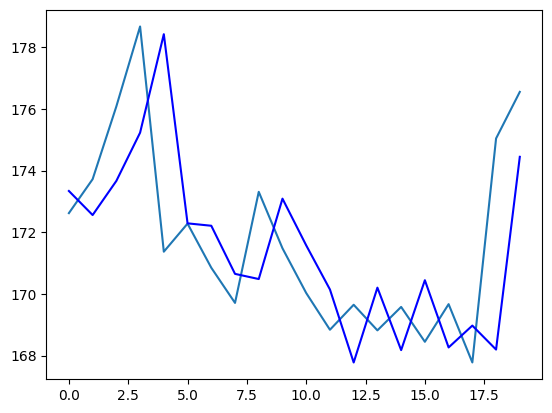

In [65]:
#from sklearn.metrics import mean_squared_error

train_val = app1_arima[:82].values
#train_size = len(train_set)
#train, test = x[0:train_size], x[train_size:]
test_val = app1_arima[82:].values
train_exog = app1_exog[:82].values
exogg = [m for m in train_exog]
test_exog = app1_exog[82:].values
history = [x for x in train_val]
predictions = []
for t in range(len(test_val)):
    model = ARIMA(history,exog=exogg,order=(0,1,0))
    model_fit = model.fit()
    output = model_fit.forecast(exog=test_exog[t])
    yhat = output[0]
    predictions.append(yhat)
    obs = test_val[t]
    ex = test_exog[t]
    history.append(obs)
    exogg.append(ex)
    #print('predicted=%f, actual=%f' % (yhat, obs))
error = mean_squared_error(test_val, predictions)
print('Test RMSE: %.3f' % np.sqrt(error))

plt.plot(test_val)
plt.plot(predictions, color='blue')

### Try LSTM

In [193]:
#ts_only = app1[['Adj Close']]
ts_only = app1.copy()

In [194]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
ts_only['Adj Close'] = scale.fit_transform(ts_only['Adj Close'].values.reshape(-1,1))
#priced = scale.fit_transform(price)

In [195]:
priced = ts_only[:80].values
# from sklearn.preprocessing import MinMaxScaler
# scale = MinMaxScaler()
# priced = scale.fit_transform(price)


In [196]:
X_train = []
y_train = []
for i in range(5,len(priced)):
    X_train.append(priced[i-5:i,0])
    y_train.append(priced[i:i+1,0])

In [197]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [198]:
X_train.shape

(75, 5)

In [199]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))
X_train.shape

(75, 5, 1)

In [200]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import math
import datetime
import keras
import warnings
warnings.filterwarnings('ignore')

from datetime import date, timedelta
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [201]:
import tensorflow as tf
tf.random.set_seed(1234)
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1), activation='tanh'))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, activation='tanh'))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 200, batch_size = 64)
     

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - loss: 0.4643
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4245 
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3844
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3355 
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2827
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2188 
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1510
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0778 
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0328 
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0679
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0979
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0836
Epoch 13/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0508
Epoch 14/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0389
Epoch 15/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0432
Epoch 16/200


In [202]:
test_value = ts_only[80:].values

In [182]:
# input = np.concatenate((priced[len(priced) - 6:],test_value[:-1]),axis = 0)
# input

In [203]:
input = np.concatenate((priced[len(priced) - 6:],test_value[:-1]),axis = 0)
# input = input.reshape(-1,1)
# input = scale.transform(input)

In [205]:
X_test = []
#y_test = test_value
y_test = app1[80:]['Adj Close'].values
for i in range(5,input.shape[0]):
    X_test.append(input[i-5:i,0])

In [206]:
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
X_test.shape

(22, 5, 1)

In [207]:
pred = model.predict(X_test)
pred = scale.inverse_transform(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [208]:
y_test

array([171.13000488, 173.        , 172.61999512, 173.72000122,
       176.08000183, 178.66999817, 171.36999512, 172.27999878,
       170.8500061 , 169.71000671, 173.30999756, 171.47999573,
       170.02999878, 168.83999634, 169.6499939 , 168.82000732,
       169.58000183, 168.44999695, 169.66999817, 167.77999878,
       175.03999329, 176.55000305])

In [209]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import math
import numpy as np
print('R^2 score: {}'.format(round(r2_score(y_test, pred), 3)))
mse = mean_squared_error(y_test, pred)
print('MSE: '+str(mse))
mae = mean_absolute_error(y_test, pred)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y_test, pred))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(pred - y_test)/np.abs(y_test))
print('MAPE: '+str(mape))

R^2 score: -0.605
MSE: 12.777773257683624
MAE: 3.2159160267223013
RMSE: 3.574601132669717
MAPE: 0.018183862485024346


In [210]:
test_df = pd.DataFrame(y_test,columns=['Adj Close'])

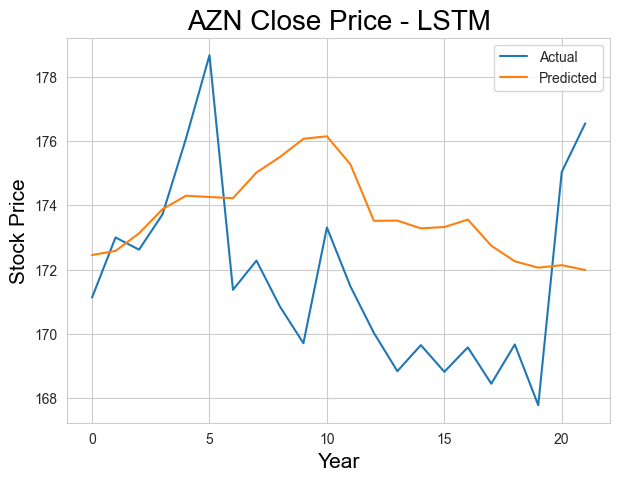

In [211]:
test_df['Predictions'] = pred

plt.figure(figsize=(7,5))
sns.set_style("whitegrid")
#plt.plot(adj_df['Adj Close'], label='Training')
plt.plot(test_df['Adj Close'], label='Actual')
plt.plot(test_df['Predictions'], label='Predicted')
plt.title("AZN Close Price - LSTM", color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Stock Price', color = 'black', fontsize = 15)
plt.legend()

In [219]:
sent = pd.read_pickle('apple_article_sentiments.pkl')

In [222]:
sent.drop(['ticker','url','body_text'],axis=1,inplace = True)

In [231]:
pd.concat([sent[158:159],sent[327:328]],axis=0)

,publish_date,title,neg,neu,pos,compound
158,2024-03-21,Apple shares down after US DOJ sues the company on iPhone monopoly claims By Investing.com,0.136,0.788,0.076,-0.9221
327,2024-03-04,Apple unveils the new 13- and 15-inch MacBook Air with the powerful M3 chip By Investing.com,0.004,0.858,0.138,0.9998


In [229]:
sent.sort_values('compound',ascending=False)

,publish_date,title,neg,neu,pos,compound
496,2024-02-02,Earnings call: Apple posts record revenue and EPS in Q1 FY2024 By Investing.com,0.021,0.842,0.137,1.0000
476,2024-02-07,Earnings call: Sonos surpasses Q1 expectations with strong results By Investing.com,0.033,0.780,0.187,1.0000
327,2024-03-04,Apple unveils the new 13- and 15-inch MacBook Air with the powerful M3 chip By Investing.com,0.004,0.858,0.138,0.9998
601,2024-01-25,Apple Announces Policy Changes in the EU By Investing.com,0.043,0.836,0.121,0.9997
688,2024-01-16,Apple previews new entertainment experiences launching with Apple Vision Pro By Investing.com,0.011,0.871,0.118,0.9995
...,...,...,...,...,...,...
59,2024-04-03,"Tesla deliveries, Taiwan earthquake, Intel loss",0.095,0.853,0.052,-0.9926
799,2023-12-27,Explainer-What is next after pause of US Apple Watch import ban? By Reuters,0.111,0.848,0.041,-0.9932
244,2024-03-13,Fatal police shooting of autistic boy in California investigated By Reuters,0.101,0.860,0.039,-0.9946
254,2024-03-11,Next Autopilot trial to test Tesla's blame-the-driver defense By Reuters,0.108,0.812,0.079,-0.9950
